In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
x = np.linspace(-4, 4, 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + np.random.normal(0, 2, 100)

In [3]:
#fit => transform
poly = PolynomialFeatures(degree=2)
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [4]:
X2 = poly.transform(X)

In [5]:
X[:5]

array([[-4.        ],
       [-3.91919192],
       [-3.83838384],
       [-3.75757576],
       [-3.67676768]])

In [6]:
#1*x**0, x**1, x**2
X2[:5]

array([[ 1.        , -4.        , 16.        ],
       [ 1.        , -3.91919192, 15.3600653 ],
       [ 1.        , -3.83838384, 14.73319049],
       [ 1.        , -3.75757576, 14.11937557],
       [ 1.        , -3.67676768, 13.51862055]])

In [7]:
linear = LinearRegression()
linear.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
linear.coef_, linear.intercept_

(array([0.        , 0.99991678, 0.44971896]), 0.20619828552962804)

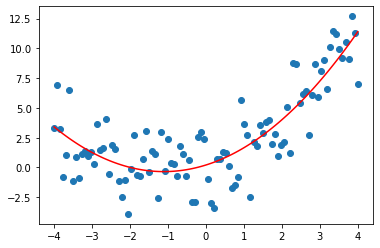

In [9]:
plt.scatter(x, y)
plt.plot(x, linear.predict(X2), color="r")
plt.show()

### 使用PipeLine

In [10]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(2)), 
    ('stand', StandardScaler()),
    ('linear', LinearRegression())])

In [11]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('stand',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

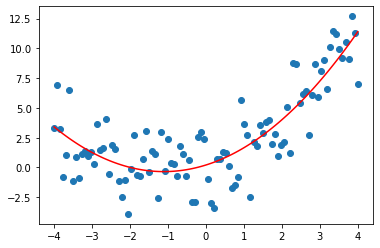

In [12]:
plt.scatter(x, y)
plt.plot(x, pipe.predict(X), color="r")
plt.show()